result for feature segmentation
20epochs+5fold-cross-validation+cross-entropy-loss
average IoU \approximate 0.475
predict threshold parameters for features:
        full_mask[1, :, :] -= 0.06
        full_mask[2, :, :] -= 0.04
        full_mask[3, :, :] -= 0.02

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import random

# show original data and mask
data_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/imgs/1_100.nii.gz'
mask_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/masks/1_100.nii.gz'

data = nib.load(data_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

print("shape of dataset %s" % str(data.shape))
print("shape of maskset %s" % str(mask.shape))

rand = (random.randint(0, data.shape[2]))
img = data[:, :, rand]
msk = mask[:, :, rand]

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(msk)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import random
import numpy as np

# show divided data and mask
# 0.1 for test set
data_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/imgs/1_100.nii.gz'
mask_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/masks/1_100.nii.gz'

data = nib.load(data_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

print("shape of test_dataset %s" % str(data.shape))
print("shape of test_maskset %s" % str(mask.shape))

rand = (random.randint(0, data.shape[2]))
img = data[:, :, rand]
msk = mask[:, :, rand]

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(msk)
plt.show()

total_feature1 = 0
total_feature2 = 0
total_feature3 = 0
total_pixel = 512.0*512.0*mask.shape[2]

for i in range(mask.shape[2]):
    total_feature1 += np.sum(mask[:, :, i] == 1)
    total_feature2 += np.sum(mask[:, :, i] == 2)
    total_feature3 += np.sum(mask[:, :, i] == 3)

print(total_feature1 / total_pixel)
print(total_feature2 / total_pixel)
print(total_feature3 / total_pixel)

In [141]:
!python drive/My\ Drive/Pytorch-UNet-master/train.py \
# --load /content/drive/My\ Drive/Pytorch-UNet-master/checkpoints/CP_epoch10.pth

INFO: Using device cuda
0.0
1.0
2.0
3.0
90
2020-09-24 14:53:16.361890: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
INFO: Starting training:
        Epochs:          20
        Batch size:      1
        Learning rate:   0.001
        Checkpoints:     True
        Device:          cuda
    
0
100% 1440/1440 [07:38<00:00,  3.14it/s, loss (epoch)=15]
1
100% 1440/1440 [07:39<00:00,  3.14it/s, loss (epoch)=16.1]
2
100% 1440/1440 [07:42<00:00,  3.11it/s, loss (epoch)=15.9]
3
100% 1440/1440 [07:39<00:00,  3.14it/s, loss (epoch)=16.4]
4
100% 1440/1440 [07:43<00:00,  3.11it/s, loss (epoch)=17.2]


In [153]:
!python drive/My\ Drive/Pytorch-UNet-master/predict.py \
--model /content/drive/My\ Drive/Pytorch-UNet-master/checkpoints/CP_epoch20.pth

INFO:root:Loading model /content/drive/My Drive/Pytorch-UNet-master/checkpoints/CP_epoch20.pth
INFO:root:Using device cuda
INFO:root:Model loaded !
(512, 512, 10)
(388, 388, 10)
torch.Size([1, 512, 512])
2.0
60833
torch.Size([1, 512, 512])
2.0
63785
torch.Size([1, 512, 512])
2.0
52445
torch.Size([1, 512, 512])
2.0
53662
torch.Size([1, 512, 512])
2.0
30413
torch.Size([1, 512, 512])
2.0
87228
torch.Size([1, 512, 512])
2.0
66073
torch.Size([1, 512, 512])
2.0
81458
torch.Size([1, 512, 512])
2.0
56467
torch.Size([1, 512, 512])
2.0
63638


the largest class number is : 
3.0
(512, 512, 10)
class 00: #TP=172390, #FP=    43, #FN=74583, IoU=0.822
class 01: #TP=  8220, #FP= 41548, #FN= 2375, IoU=0.272
class 02: #TP=  4407, #FP= 35536, #FN=  169, IoU=0.198
_________________
Mean Dice Score: 0.431
2.0


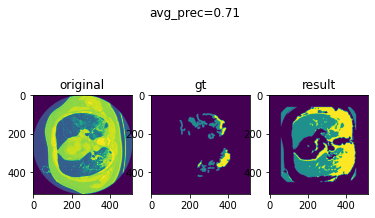

class 00: #TP=175277, #FP=   108, #FN=38632, IoU=0.900
class 01: #TP= 43374, #FP= 21865, #FN= 4528, IoU=0.767
class 02: #TP=     0, #FP= 21520, #FN=    0, IoU=0.000
class 03: #TP=     0, #FP=     0, #FN=  333, IoU=0.000
_________________
Mean Dice Score: 0.417
2.0


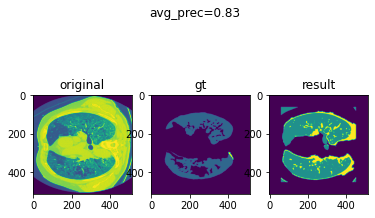

class 00: #TP=164045, #FP=     0, #FN=88830, IoU=0.787
class 01: #TP=  4794, #FP= 73946, #FN=  220, IoU=0.114
class 02: #TP=  3286, #FP= 16073, #FN=  969, IoU=0.278
_________________
Mean Dice Score: 0.393
2.0


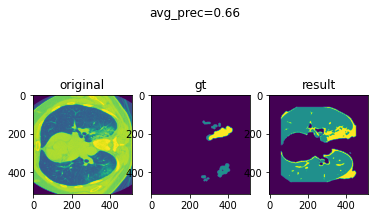

class 00: #TP=165140, #FP=   122, #FN=95122, IoU=0.776
class 01: #TP=   526, #FP= 66693, #FN=  203, IoU=0.015
class 02: #TP=   451, #FP= 29212, #FN=  702, IoU=0.029
_________________
Mean Dice Score: 0.274
2.0


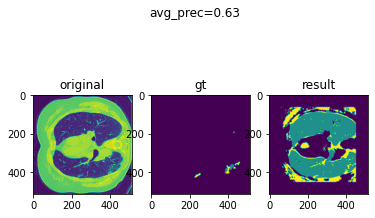

class 00: #TP=139639, #FP=  2374, #FN=110115, IoU=0.713
class 01: #TP=  4022, #FP= 99443, #FN= 2630, IoU=0.073
class 02: #TP=  3819, #FP= 12847, #FN= 1193, IoU=0.352
class 03: #TP=     0, #FP=     0, #FN=  726, IoU=0.000
_________________
Mean Dice Score: 0.285
2.0


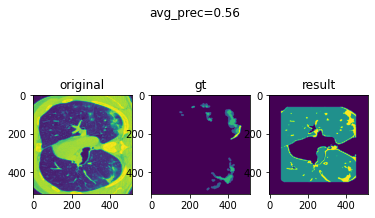

class 00: #TP=198828, #FP=     0, #FN=56504, IoU=0.876
class 01: #TP=  5067, #FP= 38433, #FN=  475, IoU=0.207
class 02: #TP=   746, #FP= 19070, #FN=  524, IoU=0.071
_________________
Mean Dice Score: 0.384
2.0


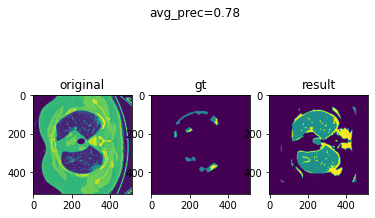

class 00: #TP=173026, #FP=  4647, #FN=56325, IoU=0.850
class 01: #TP= 19394, #FP= 41592, #FN= 7398, IoU=0.442
class 02: #TP=  5472, #FP= 18013, #FN=  529, IoU=0.371
_________________
Mean Dice Score: 0.554
2.0


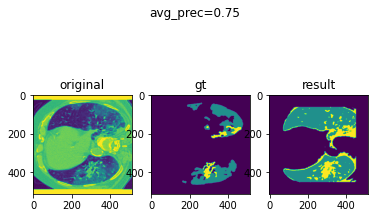

class 00: #TP=191987, #FP=  1071, #FN=45956, IoU=0.891
class 01: #TP=  3222, #FP= 26955, #FN=  276, IoU=0.191
class 02: #TP= 16358, #FP= 22551, #FN= 4345, IoU=0.549
_________________
Mean Dice Score: 0.544
2.0


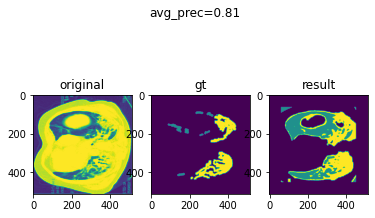

class 00: #TP=168064, #FP=     3, #FN=56051, IoU=0.857
class 01: #TP= 35151, #FP= 26279, #FN= 1781, IoU=0.715
class 02: #TP=  1062, #FP= 31585, #FN=   35, IoU=0.063
_________________
Mean Dice Score: 0.545
2.0


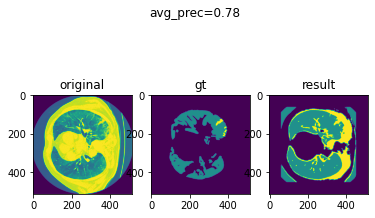

class 00: #TP=173790, #FP=  1448, #FN=70187, IoU=0.829
class 01: #TP= 12426, #FP= 52104, #FN= 1972, IoU=0.315
class 02: #TP=  2317, #FP= 20059, #FN=  701, IoU=0.182
class 03: #TP=     0, #FP=     0, #FN=  751, IoU=0.000
_________________
Mean Dice Score: 0.332
2.0


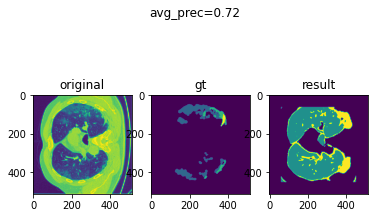

0.41580151681424393


In [155]:
import matplotlib.pyplot as plt
import os
import nibabel as nib
import numpy as np
# show the result

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def average_precision(img, msk):  
    h, w = img.shape
    same = np.sum(img == msk)

    return same / h / w

def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        if(2*TP+FP+FN == 0):
            IoU = 0
        else:
            IoU = 2*TP/float(2*TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean Dice Score: {:4.3f}".format(mIoU))
    return mIoU
# data_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/imgs/1_100.nii.gz'    
# result_path = '/content/drive/My Drive/Pytorch-UNet-master/result_test/1_100pre.nii.gz'
# mask_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/masks/1_100.nii.gz'

data_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/tests/imgs/1_100.nii.gz'    
result_path = '/content/drive/My Drive/Pytorch-UNet-master/result_test/1_100pre.nii.gz'
mask_path = '/content/drive/My Drive/Pytorch-UNet-master/1st_patient_data/tests/masks/1_100.nii.gz'

data = nib.load(data_path).get_fdata()
mask = nib.load(mask_path).get_fdata()
result = nib.load(result_path).get_fdata()
print("the largest class number is : ")
print(np.max(mask))

print(mask.shape)

IoUsum = 0
for i in range(data.shape[2]):
   plt.figure()   
   original_im = data[:, :, i]
   msk = mask[:, :, i]
   im = result[:, :, i]
   im = np.pad(im, 62, pad_with, padder=0)    
   a_p = average_precision(im, msk)
   plt.suptitle('avg_prec=%.2f' % a_p)
   mIoU = IoU(msk, im)
   IoUsum += mIoU
   plt.subplot(1, 3, 1)
   plt.title("original")
   plt.imshow(original_im)
   plt.subplot(1, 3, 2)
   plt.title("gt")
   plt.imshow(msk)
   plt.subplot(1, 3, 3)
   plt.title("result")
   print(np.max(im))
   plt.imshow(im)
   plt.show()
print(IoUsum / data.shape[2])
